# Newton Method

Approximate solution: 1.4172958150124704
Number of iterations: 7


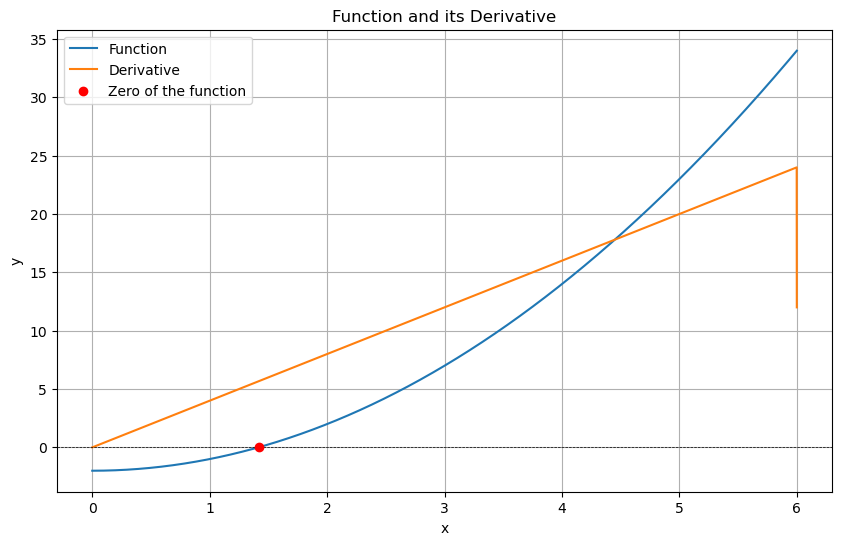

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def newton(xdata, y, x0, tolerance, max_iterations):
    """Approximate solution of f(x)=0 by Newton's method.

    Parameters
    ----------
    xdata : array-like
        Data for the function.
    y : array-like
        Function for which we are searching for a solution f(x)=0.
    x0 : number
        Initial guess for a solution f(x)=0.
    tolerance : number
        Stopping criteria is abs(x_new - x) < tolerance.
    max_iterations : integer
        Maximum number of iterations of Newton's method. 
    """
    x = x0
    for i in range(max_iterations):
        # Interpolating the data
        index = np.abs(xdata - x).argmin()  # Find the index of the closest x value in xdata
        dfdx = f_prime(xdata, y, index)     # Compute the derivative at the interpolated point
        x_new = x - y[index] / dfdx         # Compute the new estimate
        if abs(x_new - x) < tolerance:      # Check convergence
            return x_new, i
        x = x_new
    return x_new, max_iterations  # Return the last estimate if max_iterations is reached

def f_prime(xdata, y, index):
    """Compute the derivative of y with respect to x using finite differences.

    Parameters
    ----------
    xdata : array-like
        Data for the function.
    y : array-like
        Function values.
    index : integer
        Index of the point to compute the derivative at.

    Returns
    -------
    dfdx : float
        Approximate derivative of y with respect to x.
    """
    if index == 0:
        # Forward difference
        dx = xdata[index + 1] - xdata[index]
        dy = y[index + 1] - y[index]
    elif index == len(xdata) - 1:
        # Backward difference
        dx = xdata[index] - xdata[index - 1]
        dy = y[index] - y[index - 1]
    else:
        # Central difference
        dx = (xdata[index + 1] - xdata[index - 1]) / 2
        dy = y[index + 1] - y[index - 1]
    return dy / dx

# Define the problem
x0 = 2                # Initial guess
tolerance = 0.005     # Tolerance
max_iterations = 20   # Maximum number of iterations
dx = 0.001              # Step size
xdata = np.arange(0, 6, dx)
y = xdata ** 2 -2

# Solve using Newton's method
result, iterations = newton(xdata, y, x0, tolerance, max_iterations)
print("Approximate solution:", result)
print("Number of iterations:", iterations)

# Plot the function and its derivative
plt.figure(figsize=(10, 6))
plt.plot(xdata, y, label='Function')
plt.plot(xdata, [f_prime(xdata, y, i) for i in range(len(xdata))], label='Derivative')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.scatter(result, 0, color='red', label='Zero of the function', zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and its Derivative')
plt.legend()
plt.grid(True)
plt.show()